<a href="https://colab.research.google.com/github/ABMARK43/Data-Mining-Assignments/blob/master/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
from sklearn import datasets
from scipy.spatial import distance

In [0]:
iris = datasets.load_iris()


In [0]:
points = pd.DataFrame(iris.data[:,(0,1)])

In [0]:
x , y = points[0],points[1]

In [0]:
points = list(zip(x,y))

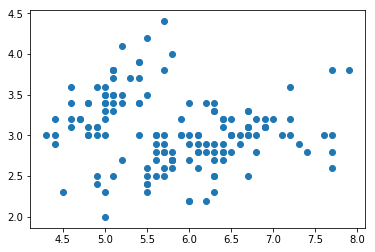

In [0]:
plt.scatter(x,y)

In [0]:
def calculate_distance_matrix(centers,points) :
  dist = []
  for i in range(len(centers)) :
        d = []
        for point in points :
            d.append(distance.euclidean(point,centers[i]))
        dist.append(d)
  return dist

In [0]:
def claculate_center(cluster,k):
  centers = []
  for i in range(k) :
    a = np.array(cluster[i]).T
    x=a.mean(axis=1)
    centers.append(x)
  return(centers)

In [0]:
def k_means(points,k,centers):
    cluster = {}
    for j in range(k):            # creating a dictionary of list for k clusters 
      cluster[j] = [] 
    z = np.array(calculate_distance_matrix(centers,points)).T    
    for i in range(len(points)) : # assigning points to their respective cluster
        m = np.argmin(z[i])
        cluster[m].append(np.array(points[i])) 
    new_centers = claculate_center(cluster,k)
    if np.sum(np.array(new_centers)-np.array(centers)) == 0 :
        return cluster
    else:
        cluster = k_means(points,k,new_centers)
        return cluster   

In [0]:
def initial_seeds(k,points):
  seeds =[]
  seeds.append(points[np.random.randint(0,len(points))])
  for i in range(k-1):
    distances = np.array(calculate_distance_matrix(seeds,points)).T
    z = distances.mean(axis = 1)
    j = np.argmax(z)
    seeds.append(points[j])
  return(seeds)
    

In [0]:
seeds = initial_seeds(5,points)

In [0]:
clusters = k_means(points,5,seeds)

In [0]:
c1 = pd.DataFrame(clusters[0])
c2 = pd.DataFrame(clusters[1])
c3 = pd.DataFrame(clusters[2])
c4 = pd.DataFrame(clusters[3])
c5 = pd.DataFrame(clusters[4])

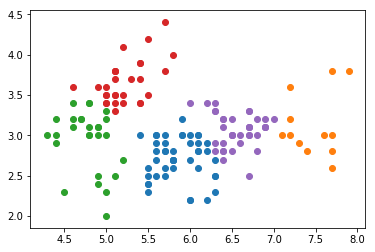

In [0]:
plt.scatter(c1.iloc[:,0],c1.iloc[:,1])
plt.scatter(c2.iloc[:,0],c2.iloc[:,1])
plt.scatter(c3.iloc[:,0],c3.iloc[:,1])
plt.scatter(c4.iloc[:,0],c4.iloc[:,1])
plt.scatter(c5.iloc[:,0],c5.iloc[:,1])